In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from matplotlib.legend_handler import HandlerLine2D




%matplotlib inline


In [71]:
# Stop deprecation warnings from being printed

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Loading data and checking data

In [72]:
from sklearn.datasets import load_digits
m_data = load_digits()

In [73]:
m_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

### Get size of dataframes


In [74]:
m_data.target.shape

(1797,)

In [75]:
m_data.data.shape

(1797, 64)

### Loading the data into pandas  dataframe

In [76]:
mnist_df = pd.DataFrame(m_data.data)
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [77]:
name_columns = []

for i in range (1,65):
    name_columns += ['pixel ' + str(i)]

mnist_df.columns = name_columns
mnist_df['Labels'] = m_data.target

In [78]:
mnist_df.head()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,Labels
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


###  Data Description

In [79]:
mnist_df.describe()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,Labels
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


### Data Types

In [80]:
mnist_df.dtypes

pixel 1     float64
pixel 2     float64
pixel 3     float64
pixel 4     float64
pixel 5     float64
pixel 6     float64
pixel 7     float64
pixel 8     float64
pixel 9     float64
pixel 10    float64
pixel 11    float64
pixel 12    float64
pixel 13    float64
pixel 14    float64
pixel 15    float64
pixel 16    float64
pixel 17    float64
pixel 18    float64
pixel 19    float64
pixel 20    float64
pixel 21    float64
pixel 22    float64
pixel 23    float64
pixel 24    float64
pixel 25    float64
pixel 26    float64
pixel 27    float64
pixel 28    float64
pixel 29    float64
pixel 30    float64
             ...   
pixel 36    float64
pixel 37    float64
pixel 38    float64
pixel 39    float64
pixel 40    float64
pixel 41    float64
pixel 42    float64
pixel 43    float64
pixel 44    float64
pixel 45    float64
pixel 46    float64
pixel 47    float64
pixel 48    float64
pixel 49    float64
pixel 50    float64
pixel 51    float64
pixel 52    float64
pixel 53    float64
pixel 54    float64


### Checking for missing data

In [81]:
mnist_df.isnull().sum()

pixel 1     0
pixel 2     0
pixel 3     0
pixel 4     0
pixel 5     0
pixel 6     0
pixel 7     0
pixel 8     0
pixel 9     0
pixel 10    0
pixel 11    0
pixel 12    0
pixel 13    0
pixel 14    0
pixel 15    0
pixel 16    0
pixel 17    0
pixel 18    0
pixel 19    0
pixel 20    0
pixel 21    0
pixel 22    0
pixel 23    0
pixel 24    0
pixel 25    0
pixel 26    0
pixel 27    0
pixel 28    0
pixel 29    0
pixel 30    0
           ..
pixel 36    0
pixel 37    0
pixel 38    0
pixel 39    0
pixel 40    0
pixel 41    0
pixel 42    0
pixel 43    0
pixel 44    0
pixel 45    0
pixel 46    0
pixel 47    0
pixel 48    0
pixel 49    0
pixel 50    0
pixel 51    0
pixel 52    0
pixel 53    0
pixel 54    0
pixel 55    0
pixel 56    0
pixel 57    0
pixel 58    0
pixel 59    0
pixel 60    0
pixel 61    0
pixel 62    0
pixel 63    0
pixel 64    0
Labels      0
Length: 65, dtype: int64

There is no missing data

### Visualize the image.
Showing the first 10 examples of the training data.

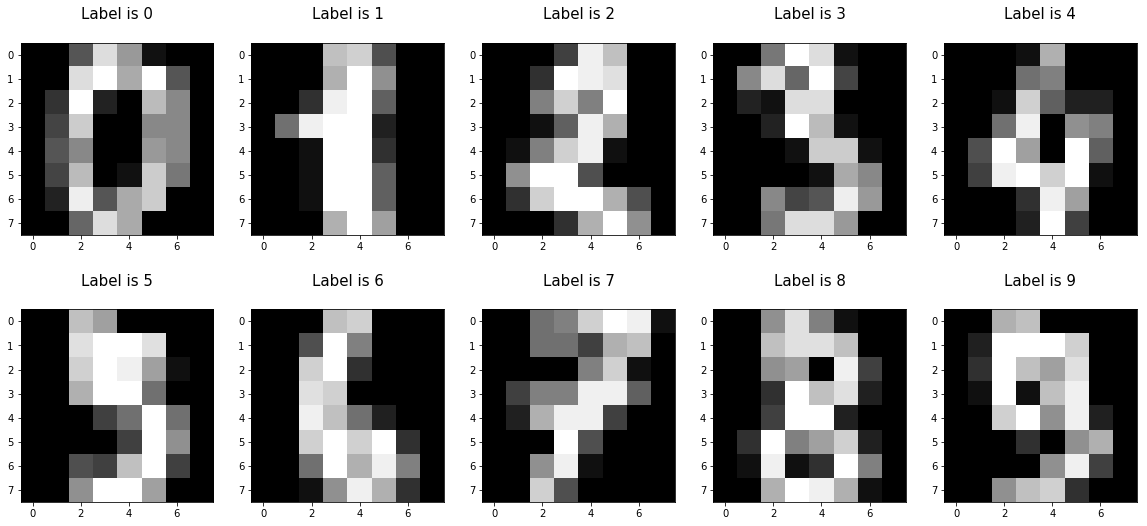

In [82]:
plt.figure(figsize = (20,9))
pixel = mnist_df.iloc[0:10, 0:64].values
target = mnist_df.iloc[0:10,-1 ].values

for index, (image, label) in enumerate(zip(pixel,target)):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Label is %i\n' % label, fontsize = 15)

###  Splitting the dataset into training and testing set
 For any supervise machine learning task, the idea of building model using all the dataset is not good idea. The main goal is to find out how good your model will be when 'an unseen' dataset is evaluated. It is highly recommended to always split your data into a training and testing set. In this light we do a 70$\%$ - 30$\%$ random split of data between training and testing respectively.

In [83]:
X = mnist_df.iloc[: , 0:64].values
Y = mnist_df['Labels'].values


In [84]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# training dataset
X_train = mnist_df.iloc[0:1257,0:64]
Y_train = mnist_df.iloc[0:1257,64]

#testing dataset 
X_test = mnist_df.iloc[1257:, 0:64]
Y_test = mnist_df.iloc[1257:, 64]

In [85]:
X_train.shape, Y_train.shape

((1257, 64), (1257,))

In [169]:
X_test.shape, Y_test.shape

((540, 64), (540,))

 ### Fitting a random forest with default parameters to get a baseline idea of the performance

In [86]:
base_model = RandomForestClassifier(random_state=11)
base_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

### Testing and  Evaluating the model
Now our model is ready, we must evaluate our model. In a classification problem, its common to evaluate the model  using the accuracy or confusion matrix.


In [87]:
# predicting the model for X_train sample 

y_predtrain = base_model.predict(X_train)


# classification accuracy for the training data prediction verses actual

accuracy_score(y_predtrain, Y_train)

1.0

In [88]:
# predicting the model for X_test sample 

y_predtest = base_model.predict(X_test)

# classification accuracy for the test data prediction verses actual

accuracy_score(y_predtest, Y_test)


0.9037037037037037

## Tuning parameter for random forest performance

### Independent Parameter tuning

- Tuning parameters independently is not the best approach but it will reveal or give us an insight information of the respective parameters for better random forest peroformance.


In [89]:
# tuning n_estimators

n_estimators = [1, 2, 4, 10, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
    rf= RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state= 11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)

    train_acc = accuracy_score(train_pred, Y_train)
    train_results += [train_acc]

    y_pred = rf.predict(X_test)
    
    pred_acc = accuracy_score(y_pred, Y_test)
    test_results += [pred_acc] 

In [90]:
# tuning max_depth
max_depths = [int(x) for x in np.linspace(1, 30, 30, endpoint=True)]

trainresult= []
testresult = []
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)


    y_pred = rf.predict(X_test)
    
    
    trainresult.append(accuracy_score(train_pred, Y_train))
    
    testresult.append(accuracy_score(y_pred, Y_test))
    


In [91]:
#tuning min_samples_split with value greater or equal to 2

min_samples_splits = list(range(2,12))
train_result = []
test_result = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    train_result.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    test_result.append(pred_accuracy)




In [92]:
#tuning min_samples_split with value between (0,0.5]

min_samples_splits1 = np.linspace(0.1, 1, 10, endpoint=True)

train_result1 = []
test_result1 = []
for min_samples_split in min_samples_splits1:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    train_result1.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    test_result1.append(pred_accuracy)




In [93]:
#tuning min_samples_leaf with value greater or equal to 2

min_samples_leafs = list(range(2,12))

trainresults = []
testresults = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    trainresults.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    testresults.append(pred_accuracy)



In [94]:
#tuning min_samples_leaf with value between (0,0.5]

min_samples_leafs1 = np.linspace(0.1, 0.5, 10, endpoint=True)

trainresults1 = []
testresults1 = []
for min_samples_leaf in min_samples_leafs1:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    
    train_accuracy = accuracy_score(train_pred,Y_train)
    trainresults1.append(train_accuracy)

    y_pred = rf.predict(X_test)
    
    pred_accuracy = accuracy_score(y_pred,Y_test)
    testresults1.append(pred_accuracy)



In [95]:
# tuning max_feature

max_features = list(range(1,mnist_df.shape[1]-1))

train_res= []
test_res = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, random_state=11)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)
    train_acc = accuracy_score(train_pred, Y_train)
    train_res += [train_acc]

    y_pred = rf.predict(X_test)
    pred_acc = accuracy_score(y_pred, Y_test)
    test_res += [pred_acc]
    


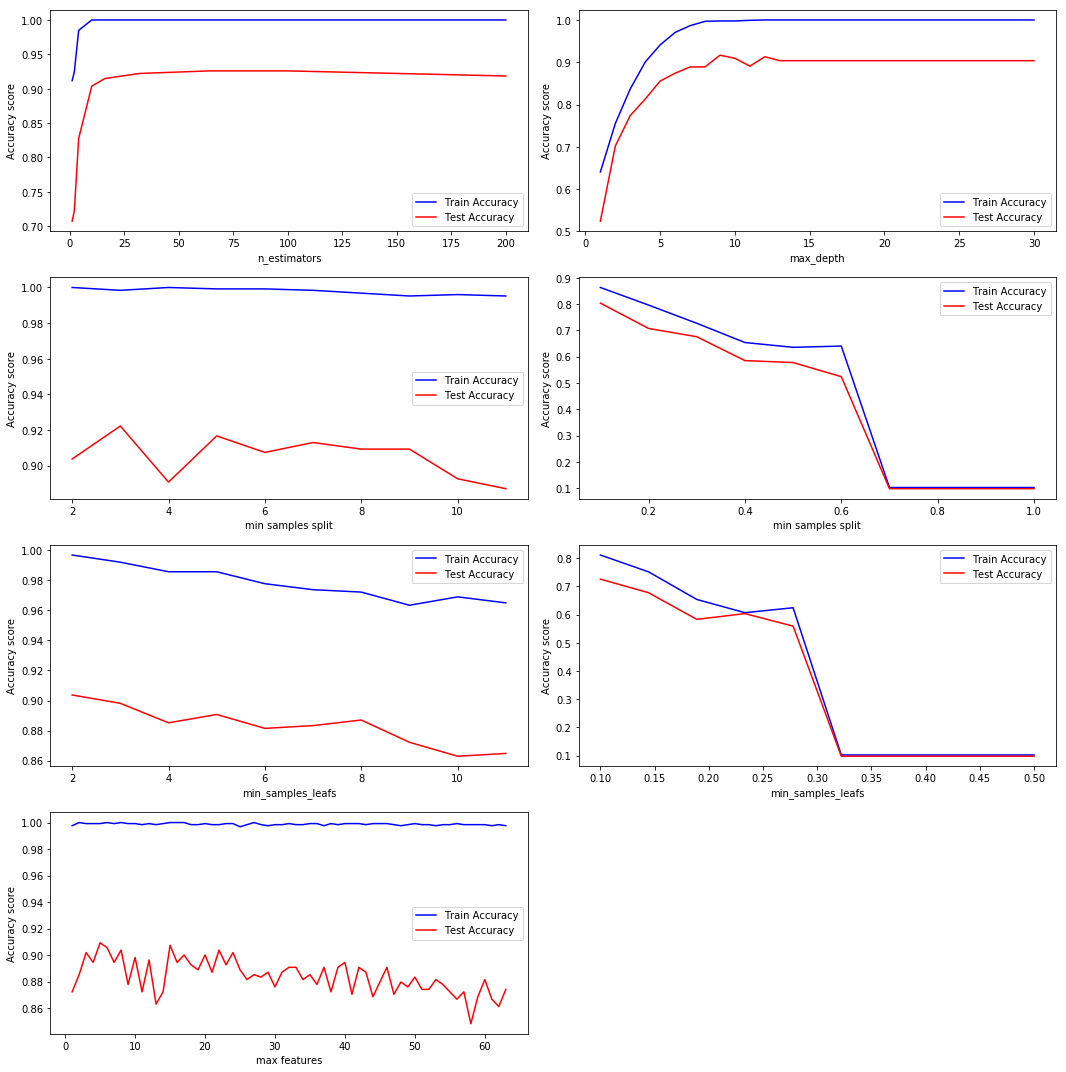

In [96]:
fig = plt.figure(figsize=(15, 15))

# Ploting the Accuracy against the n_estimators 
sub1 = fig.add_subplot(421)
sub1.plot(n_estimators, train_results, 'b', label= 'Train Accuracy' )
sub1.plot(n_estimators, test_results, 'r',  label = 'Test Accuracy')
sub1.set_xlabel('n_estimators')
sub1.set_ylabel('Accuracy score')
plt.legend()


# Ploting Accuracy against max_depth 
sub2 = fig.add_subplot(422)
sub2.plot(max_depths, trainresult, 'b', label= 'Train Accuracy')
sub2.plot(max_depths, testresult, 'r',  label = 'Test Accuracy')
sub2.set_xlabel('max_depth')
sub2.set_ylabel('Accuracy score')
plt.legend()

#  Ploting Accuracy against min_samples_split with interval greater equal to 2
sub3 = fig.add_subplot(423)
sub3.plot(min_samples_splits, train_result, 'b', label= 'Train Accuracy')
sub3.plot(min_samples_splits, test_result, 'r', label= 'Test Accuracy')
sub3.set_xlabel('min samples split')
sub3.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_split interval lies between (0,0.5]
sub4 = fig.add_subplot(424)
sub4.plot(min_samples_splits1, train_result1, 'b', label= 'Train Accuracy')
sub4.plot(min_samples_splits1, test_result1, 'r', label= 'Test Accuracy')
sub4.set_xlabel('min samples split')
sub4.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_leaf with interval greater equal to 2
sub5 = fig.add_subplot(425)
sub5.plot(min_samples_leafs, trainresults, 'b', label='Train Accuracy')
sub5.plot(min_samples_leafs, testresults, 'r', label='Test Accuracy')
sub5.set_xlabel('min_samples_leafs')
sub5.set_ylabel('Accuracy score')
plt.legend()

# Ploting Accuracy against min_samples_leaf interval lies between (0,0.5]
sub6 = fig.add_subplot(426)
sub6.plot(min_samples_leafs1, trainresults1, 'b', label='Train Accuracy')
sub6.plot(min_samples_leafs1, testresults1, 'r', label='Test Accuracy')
sub6.set_xlabel('min_samples_leafs')
sub6.set_ylabel('Accuracy score')
plt.legend()
# Ploting Accuracy against max_feature
sub7 = fig.add_subplot(427)
sub7.plot(max_features, train_res, 'b', label='Train Accuracy')
sub7.plot(max_features, test_res, 'r', label='Test Accuracy')
sub7.set_xlabel('max features')
sub7.set_ylabel('Accuracy score')
plt.legend()


plt.tight_layout()
plt.show()



I can narrow search of parameters using the plots above. For example, the tree depth has steadily constant from 15 and thus I will be considering an interval from that points. Also, the number of trees can take a a  range from 65 upwards. Similarly, min_samples_leaf decreases so I will stick with value 2 since its give a better accuracy.In the case of max_feature,I observed that at value the 8 there was a better model accuracy. Therefore I will restrict my search to default value that is 'auto' which the sqaure roots of the number of features. In our situation that will be 8.



### Searching multiple parameters simultaneously
We will be looking at two method of parameter tuning:
-  $\textbf{Using GridSearchCV} $ :


- $ \textbf{Using RandomSearchCV} $:

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.


### RandomSearchCV

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 65, stop = 200, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 30, num = 10)]
max_depth.append(None)

# evaulation criterion 
criterion =['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'criterion': criterion}

In [98]:
rf_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose=0, random_state=42, n_jobs = -1)

In [99]:
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [65, 80, 95, 110, 125, 140, 155, 170, 185, 200], 'max_depth': [15, 16, 18, 20, 21, 23, 25, 26, 28, 30, None], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [100]:
rd = pd.DataFrame(rf_random.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
rd

,mean_test_score,std_test_score,params
0,0.919650,0.032344,"{'n_estimators': 95, 'max_depth': 18, 'criteri..."
1,0.922832,0.029310,"{'n_estimators': 185, 'max_depth': 20, 'criter..."
2,0.926014,0.033481,"{'n_estimators': 110, 'max_depth': 30, 'criter..."
3,0.929992,0.026726,"{'n_estimators': 65, 'max_depth': 26, 'criteri..."
4,0.921241,0.039441,"{'n_estimators': 140, 'max_depth': 16, 'criter..."
5,0.922832,0.030704,"{'n_estimators': 140, 'max_depth': 15, 'criter..."
6,0.919650,0.032344,"{'n_estimators': 95, 'max_depth': 25, 'criteri..."
7,0.925219,0.029466,"{'n_estimators': 200, 'max_depth': 30, 'criter..."
8,0.922037,0.038182,"{'n_estimators': 140, 'max_depth': 26, 'criter..."
9,0.919650,0.032344,"{'n_estimators': 95, 'max_depth': 20, 'criteri..."


In [109]:
rf_random.best_score_

0.9299920445505171

In [110]:
rf_random.best_params_

{'n_estimators': 65, 'max_depth': 26, 'criterion': 'entropy'}

In [112]:
for i in range(100):
    if rd.iloc[i][0]==0.9299920445505171:
        print(rd.iloc[i][2])

{'n_estimators': 65, 'max_depth': 26, 'criterion': 'entropy'}
{'n_estimators': 65, 'max_depth': 28, 'criterion': 'entropy'}
{'n_estimators': 65, 'max_depth': None, 'criterion': 'entropy'}
{'n_estimators': 65, 'max_depth': 16, 'criterion': 'entropy'}
{'n_estimators': 65, 'max_depth': 20, 'criterion': 'entropy'}
{'n_estimators': 65, 'max_depth': 21, 'criterion': 'entropy'}


In [182]:
cfl = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [183]:
cfl.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [184]:
Y_predtrain =cfl.predict(X_train)


In [190]:
Y_predtest = cfl.predict(X_test)
count = 0
for i in range(540):
    if Y_predtest[i]== Y_test.values[i]:
        count += 1
count

500

In [188]:
accuracy_score(Y_predtrain, Y_train), accuracy_score(Y_predtest, Y_test)

(1.0, 0.9259259259259259)